In [1]:
import torch
import torch.nn as nn
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 2
hidden_size = 2
output_size = 1
num_epochs = 1000
learning_rate = 0.1

# Logic Gate dataset (inputs and outputs)
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_AND = np.array([[0], [0], [0], [1]])

X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_OR = np.array([[0], [1], [1], [1]])

X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_XOR = np.array([[0], [1], [1], [0]])

# Choose a logic gate
X = X_AND
Y = Y_AND

# Convert to tensors
X = torch.from_numpy(X).float().to(device)
Y = torch.from_numpy(Y).float().to(device)

# Neural Network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    predicted = model(X)
    predicted = predicted.round()
    print(f'Predicted: {predicted}')
    print(f'Actual: {Y}')

Epoch [100/1000], Loss: 0.1799
Epoch [200/1000], Loss: 0.1679
Epoch [300/1000], Loss: 0.0638
Epoch [400/1000], Loss: 0.0625
Epoch [500/1000], Loss: 0.0625
Epoch [600/1000], Loss: 0.0625
Epoch [700/1000], Loss: 0.0625
Epoch [800/1000], Loss: 0.0625
Epoch [900/1000], Loss: 0.0625
Epoch [1000/1000], Loss: 0.0625
Predicted: tensor([[-0.],
        [0.],
        [0.],
        [1.]])
Actual: tensor([[0.],
        [0.],
        [0.],
        [1.]])


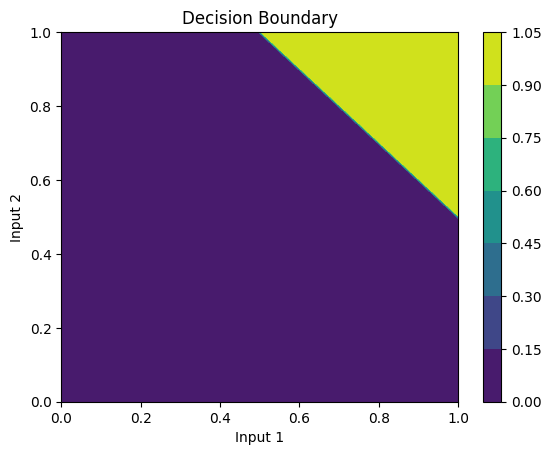

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of input values
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate the model on the grid
X = torch.from_numpy(np.column_stack((X1.ravel(), X2.ravel()))).float().to(device)
with torch.no_grad():
    outputs = model(X)
    outputs = outputs.round()
    outputs = outputs.cpu().numpy().reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, outputs, cmap='viridis')
plt.colorbar()
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Decision Boundary')
plt.show()